<a href="https://colab.research.google.com/github/2017710206255MN/Machine-Learning/blob/main/Week_10_Homework_2_All_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from google.colab import drive

In [278]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Data/Wine.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [281]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [282]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


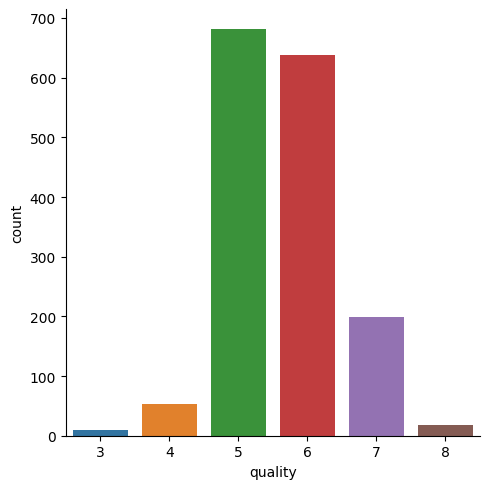

In [283]:
sns.catplot(x="quality", data=data, kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

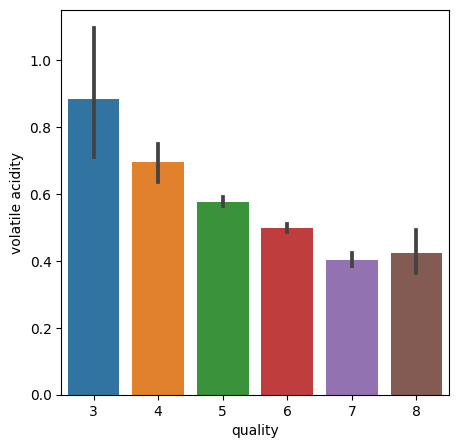

In [284]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

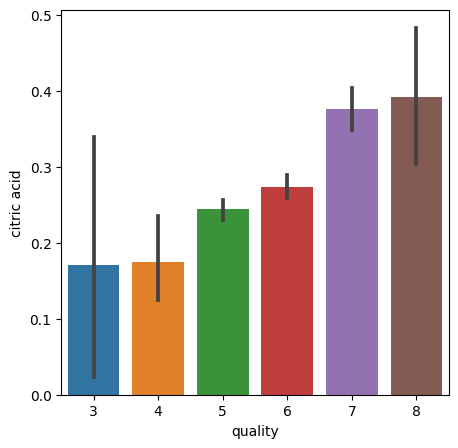

In [285]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="citric acid", data=data)

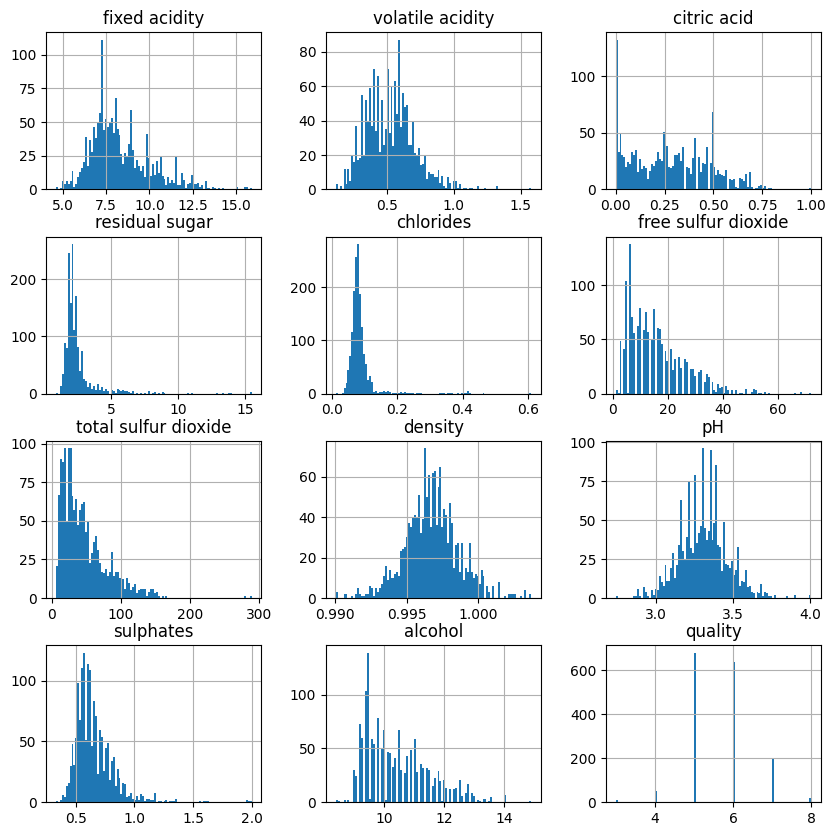

In [286]:
data.hist(bins=100, figsize=(10,10))
plt.show()

In [287]:
X=data.drop("quality", axis=1)

In [288]:
Y = data["quality"].apply(lambda y_value:1 if y_value>=6.5 else 0)

In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [290]:
data_lr = pd.read_csv('/content/drive/MyDrive/Data/Wine.csv')

In [291]:
data_lr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [292]:
x = data_lr.drop('quality',axis=1)
y = data_lr['quality']

In [293]:
linear_model = LinearRegression()

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
linear_model.fit(x_train,y_train)
pred_train = linear_model.predict(x_train)
pred_test = linear_model.predict(x_test)

In [295]:
error_score_train=metrics.r2_score(y_train,pred_train)
error_score_test=metrics.r2_score(y_test,pred_test)

In [296]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, Y_test)

In [297]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, Y_test)

In [298]:
rforest = RandomForestClassifier()
rforest.fit(X_train, Y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, Y_test)

In [299]:
svc = SVC(random_state=42)
svc.fit(X_train,Y_train)    
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, Y_test)

In [300]:
svm = GaussianNB()
svm.fit(X_train,Y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(svm_pred, Y_test)

In [301]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred, Y_test)

In [309]:
print('Test Accuracy score of Logistic Regression is:..............', logreg_acc*100)
print('Test Accuracy score of Decision Tree  is:...................', dtree_acc*100)
print('Test Accuracy score of Random Forest is:....................', rforest_acc*100)
print('Test Accuracy score of SVC is :.............................', svc_acc*100)
print('Test Accuracy score of SVM is:..............................', svm_acc*100)
print('Test Accuracy score of KNN is:..............................', knn_acc*100)
print('\nLinear Regression\nMAE:........................................................',round(metrics.mean_absolute_error(y_train, pred_train)*100,2))
print('MSE:........................................................',round(metrics.mean_squared_error(y_train, pred_train)*100,2))
print('RMSE:.......................................................',round(np.sqrt(metrics.mean_squared_error(y_train, pred_train))*100,2))
print('MAE:........................................................',round(metrics.mean_absolute_error(y_test, pred_test)*100,2))
print('MSE:........................................................',round(metrics.mean_squared_error(y_test, pred_test)*100,2))
print('RMSE:.......................................................',round(np.sqrt(metrics.mean_squared_error(y_test, pred_test))*100,2))
print('R squared error (Train_data):...............................',round(error_score_train*100,2))
print('R squared error (Test_data):................................',round(error_score_test*100,2))

Test Accuracy score of Logistic Regression is:.............. 90.3125
Test Accuracy score of Decision Tree  is:................... 91.875
Test Accuracy score of Random Forest is:.................... 94.0625
Test Accuracy score of SVC is :............................. 88.4375
Test Accuracy score of SVM is:.............................. 85.625
Test Accuracy score of KNN is:.............................. 86.875

Linear Regression
MAE:........................................................ 48.95
MSE:........................................................ 38.89
RMSE:....................................................... 62.36
MAE:........................................................ 53.3
MSE:........................................................ 49.09
RMSE:....................................................... 70.06
R squared error (Train_data):............................... 38.12
R squared error (Test_data):................................ 30.36
